In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('seaborn')
sns.set(font_scale = 2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

Essential Importing

In [14]:
df_train = pd.read_csv("E:\\GithubProjects\\KagglePractice\\Titanic-OnMyOwn\\train.csv")
df_test = pd.read_csv("E:\\GithubProjects\\KagglePractice\\Titanic-OnMyOwn\\test.csv")

In [15]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Reading data by csv and checking data

In [16]:
df_train = df_train.replace("male", 0)
df_train = df_train.replace("female", 1)

df_test = df_test.replace("male", 0)
df_test = df_test.replace("female", 1)

Change str("male") to 0 and change str("female") to 1

Female : 1
Male : 0

In [17]:
print("NullCount")
df_train.agg(lambda x : sum(x.isnull()))

NullCount


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Check nan of data

<AxesSubplot: xlabel='Pclass'>

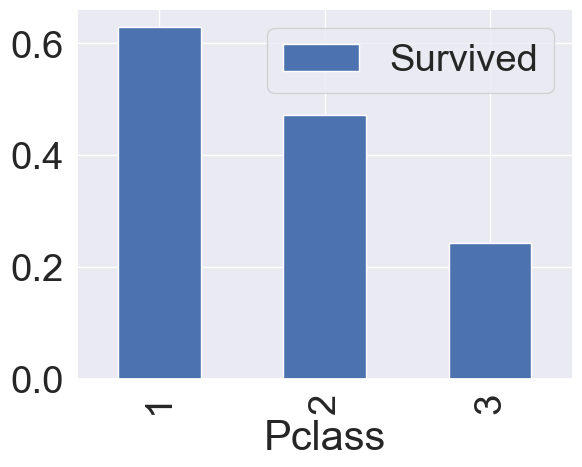

In [18]:
df_train[['Pclass', 'Survived']].groupby(
	['Pclass'], as_index=True
).mean().sort_values(
	by='Survived', ascending=False #ascending = 오름차순
).plot.bar()

# According to this plot bar, Survivors are realted to the 'Pclass'

as_index=False
Pclass	Survived
0	1	0.629630
1	2	0.472826
2	3	0.242363

as_index=True
	Survived
Pclass	
1	0.629630
2	0.472826
3	0.242363

<AxesSubplot: xlabel='Sex'>

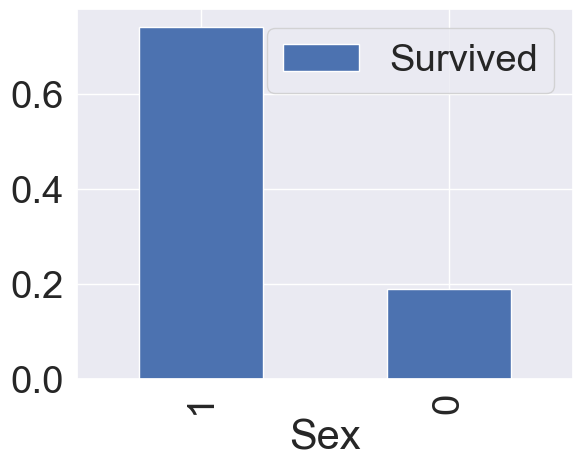

In [19]:
df_train[['Sex', 'Survived']].groupby(
	['Sex'], as_index=True
).mean().sort_values(
	by='Survived', ascending=False #ascending = 오름차순
).plot.bar()

# According to this plot bar, Survivors are realted to the 'Sex'
# 	Survived
# Sex	
# 0	0.188908 ( Male )
# 1	0.742038 ( Female )

<AxesSubplot: xlabel='SibSp'>

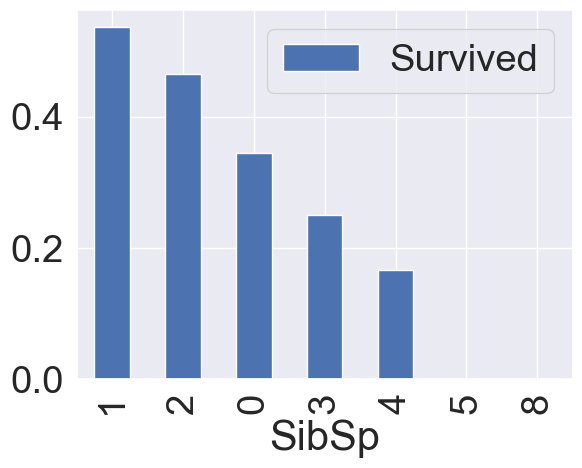

In [20]:
df_train[['SibSp', 'Survived']].groupby(
	['SibSp'], as_index=True
).mean().sort_values(
	by='Survived', ascending=False #ascending = 오름차순
).plot.bar()

# According to this plot bar, Survivors are realted to the 'SibSp'

# 	Survived
# SibSp	
# 0	0.345395
# 1	0.535885
# 2	0.464286
# 3	0.250000
# 4	0.166667
# 5	0.000000
# 8	0.000000

<AxesSubplot: xlabel='Parch'>

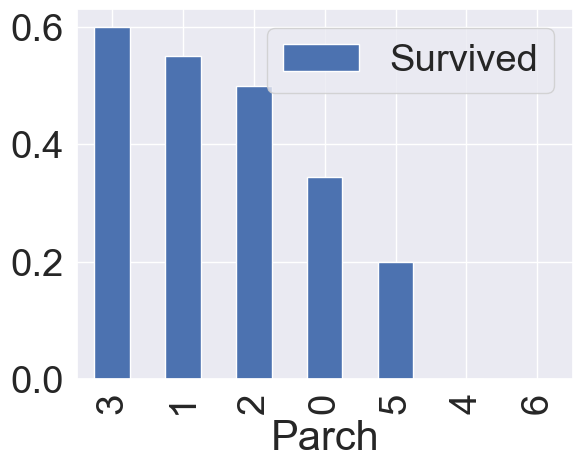

In [21]:
df_train[['Parch', 'Survived']].groupby(
	['Parch'], as_index=True
).mean().sort_values(
	by='Survived', ascending=False #ascending = 오름차순
).plot.bar()


# Survived
# Parch	
# 0	0.343658
# 1	0.550847
# 2	0.500000
# 3	0.600000
# 4	0.000000
# 5	0.200000
# 6	0.000000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


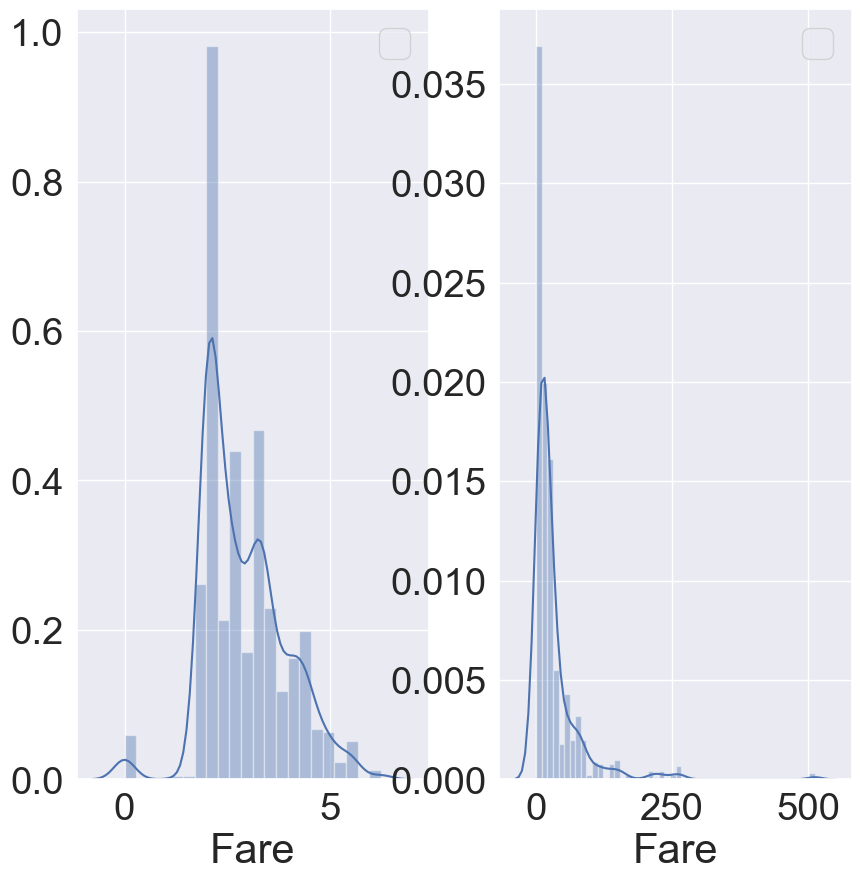

In [22]:
CustomValue = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

f, ax = plt.subplots(1, 2, figsize=(10 ,10))
g = sns.distplot(CustomValue, color='b', ax = ax[0])
g = g.legend(loc='best')

g = sns.distplot(df_train['Fare'], color='b', ax = ax[1])
g = g.legend(loc='best')

In [23]:
for i in range(0, int(df_train['Fare'].max()), 10):
	val = df_train[(df_train['Fare'] < i) & (df_train['Fare'] >= (i - 10))]["Survived"].mean()
	if str(val) != "nan":
		print(i,val)

print("==============================")

# df_log_Fare = df_train
# df_log_Fare['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
# # print(df_log_Fare['Fare'])

# for i in range(0, int(df_log_Fare['Fare'].max() * 100), 10):
# 	val = df_log_Fare[(df_log_Fare['Fare'] < i*0.01) & (df_log_Fare['Fare'] >= (i - 10)*0.01)]["Survived"].mean()
# 	if str(val) != "nan":
# 		print(i,val)

# According to this data, Survivors are realted to the 'Fare'

10 0.19940476190476192
20 0.4245810055865922
30 0.4264705882352941
40 0.4375
50 0.26666666666666666
60 0.6923076923076923
70 0.35294117647058826
80 0.5862068965517241
90 0.8666666666666667
100 0.875
110 0.5
120 0.7142857142857143
130 1.0
140 0.8571428571428571
150 1.0
160 0.5714285714285714
170 1.0
220 0.75
230 0.6
250 0.5
270 0.6666666666666666


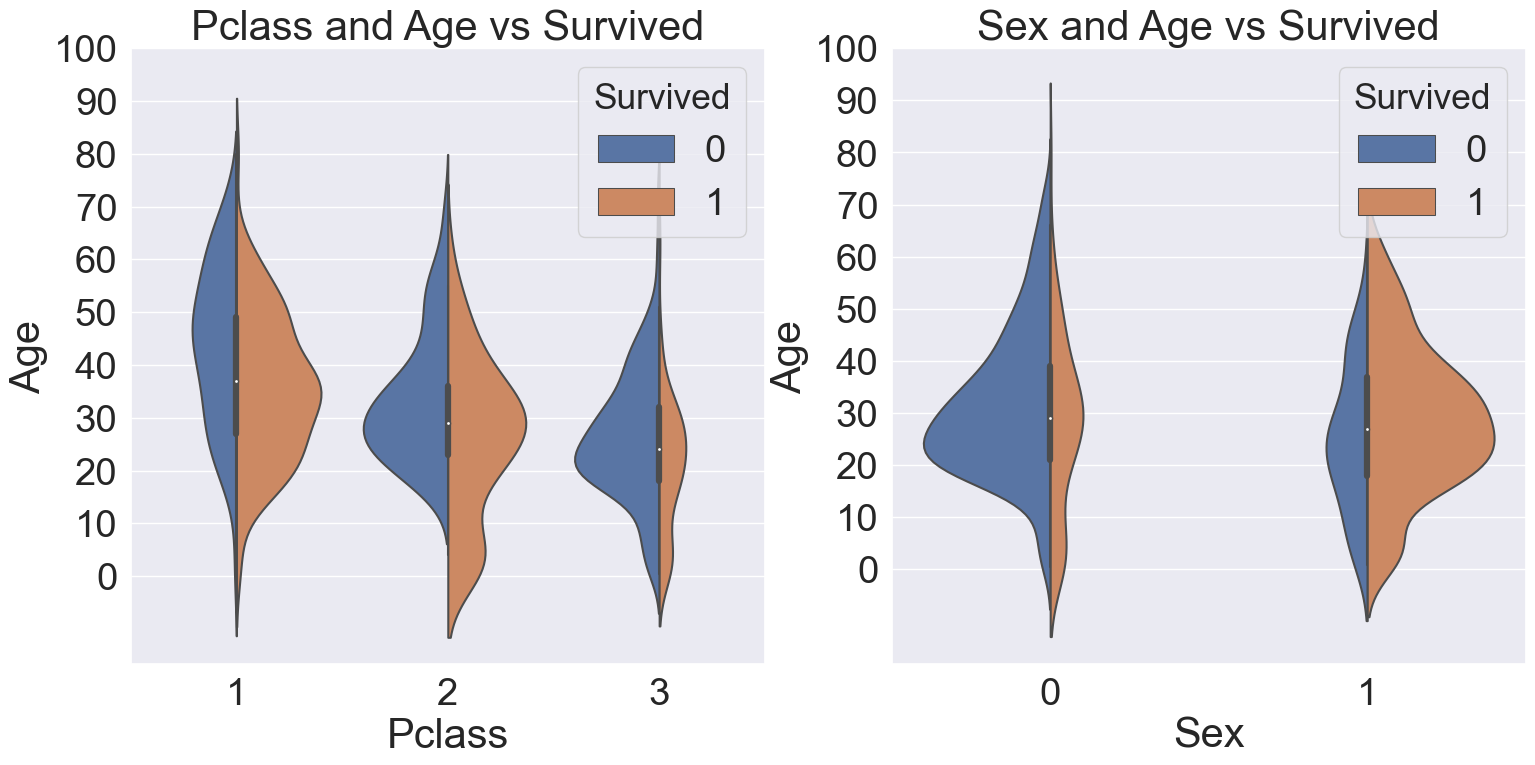

In [24]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue="Survived", data=df_train, scale = 'count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

<AxesSubplot: xlabel='Embarked'>

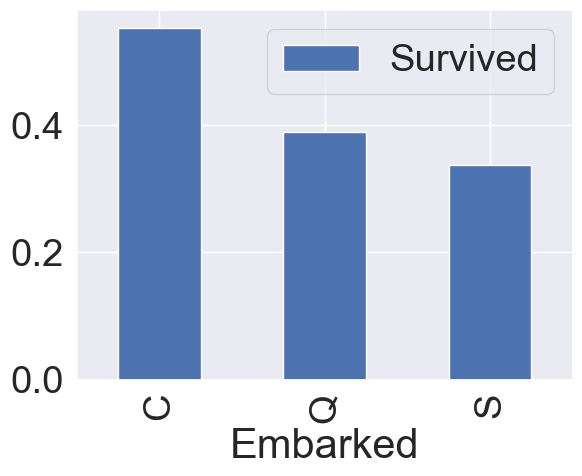

In [25]:
df_train[['Embarked', 'Survived']].groupby(
	['Embarked'], as_index=True
).mean().sort_values(
	by='Survived', ascending=False #ascending = 오름차순
).plot.bar()

# According to this plot bar, Survivors are realted to the 'Embarked'

So, survivors are related to 'Sex, Pclass, Embarked, SibSp, Parch, Fare' and 'age'

Let's write what we have to use in learning

Useless : It won't be used as DataX or DataY
DataX : It`ll be used as learn
DataY : It`ll be used as answer

PassengerId : Useless ( Cause : It's just a number that starts at 1 )
Survived : DataY(int)
Pclass : DataX(int)
Name : Useless ( Cause : It's just a name )
Sex : DataX(int in [4])
Age : DataX(float) ( But, it needs to fill in 177 nan values )
SibSp : DataX(int)
Parch : DataX(int)
Ticket : Useless ( Cause : It's just a string )
Fare : DataX(float)
Cabin : Useless ( Cause : It has so many nan values )
Embarked : DataX(str) ( But, it needs to fill in 2 nan values and it needs to be converted to int )


In [5]
Datas    NullCount
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
df_train = df_train.replace("C", 1)
df_train = df_train.replace("Q", 0.5)
df_train = df_train.replace("S", 0)

df_test = df_test.replace("C", 1)
df_test = df_test.replace("Q", 0.5)
df_test = df_test.replace("S", 0)

In [27]:
df_train['Embarked'] = df_train['Embarked'].fillna(0.5)
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())

df_test['Embarked'] = df_test['Embarked'].fillna(0.5)
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())

In [36]:
df_train.agg(lambda x : sum(x.isnull()))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [38]:
df_test.agg(lambda x : sum(x.isnull()))

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [37]:
# PassengerId      0
# Pclass           0
# Name             0
# Sex              0
# Age              0
# SibSp            0
# Parch            0
# Ticket           0
# Fare             1
# Cabin          327
# Embarked         0
# dtype: int64
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

It's time to learn.

In [39]:
import tensorflow as tf

model = tf.keras.models.Sequential([
	tf.keras.layers.Dense(512, activation='tanh'),
	tf.keras.layers.Dense(256, activation='tanh'),
	tf.keras.layers.Dense(128, activation='tanh'),
	tf.keras.layers.Dense(64, activation='tanh'),
	tf.keras.layers.Dense(32, activation='tanh'),
	tf.keras.layers.Dense(1, activation='sigmoid'), #Change answer to 1 ~ 0
])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [42]:
DataY = df_train['Survived'].values 

DataX = []
for i, rows in df_train.iterrows():
	DataX.append([
		rows['Pclass'],
		rows['Embarked'],
		rows['Fare'],
		rows['Parch'],
		rows['SibSp'],
		rows['Age'],
		rows['Sex'],
	])
DataX = np.array(DataX)

In [46]:
model.fit(DataX, DataY, epochs = 500)

Epoch 1/500
28/28 [==============================] - 0s 4ms/step - loss: 0.1773 - accuracy: 0.9248
Epoch 2/500
28/28 [==============================] - 0s 3ms/step - loss: 0.1930 - accuracy: 0.9169
Epoch 3/500
28/28 [==============================] - 0s 3ms/step - loss: 0.1772 - accuracy: 0.9192
Epoch 4/500
28/28 [==============================] - 0s 3ms/step - loss: 0.1654 - accuracy: 0.9192
Epoch 5/500
28/28 [==============================] - 0s 3ms/step - loss: 0.1585 - accuracy: 0.9315
Epoch 6/500
28/28 [==============================] - 0s 3ms/step - loss: 0.1583 - accuracy: 0.9327
Epoch 7/500
28/28 [==============================] - 0s 3ms/step - loss: 0.1491 - accuracy: 0.9293
Epoch 8/500
28/28 [==============================] - 0s 3ms/step - loss: 0.2277 - accuracy: 0.9169
Epoch 9/500
28/28 [==============================] - 0s 3ms/step - loss: 0.1964 - accuracy: 0.9214
Epoch 10/500
28/28 [==============================] - 0s 3ms/step - loss: 0.1894 - accuracy: 0.9248
Epoch 11/

I think this accuracy is best one now

Let's predict

In [48]:
PredictX = []
for i, rows in df_test.iterrows():
	PredictX.append([
		rows['Pclass'],
		rows['Embarked'],
		rows['Fare'],
		rows['Parch'],
		rows['SibSp'],
		rows['Age'],
		rows['Sex'],
	])
PredictX = np.array(PredictX)

In [87]:
PredictY = model.predict(PredictX)

14/14 [==============================] - 0s 2ms/step


In [101]:
Result = []
i = 0
for rows in PredictY:
	Result.append([i + 892, 1 if rows[0] > 0.5 else 0])
	i = i + 1
Result = np.array(Result)

In [102]:
Result = pd.DataFrame(Result, columns=['PassengerId','Survived'])
Result.to_csv("E:\\GithubProjects\\KagglePractice\\Titanic-OnMyOwn\\result.csv", index=False)

Submission and Description

Public Score
0.74401